<a href="https://colab.research.google.com/github/Emmaculate2020/WK7-INDEPENDENT-PROJECT-SUPERVISED-LEARNING---REGRESSION-ANALYSIS/blob/master/WK7_DATA_SCIENCE_CORE_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis using Python

## 1. Defining the Question

### a) Specifying the Question


> To study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months and create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



### b) Defining the Metric for Success
> Make predictions with different models then determine the best model for making best predictions, in this case house pricing.

## 2. Reading the Data

In [1]:
# Loading necessary libraries
#

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Dataset
# Dataset  = Independent Project Week 7 - house_data.csv 
#

df = pd.read_csv("Independent Project Week 7 - house_data.csv")

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#

df.shape

(21613, 20)

In [4]:
# Previewing the top of our dataset
#

df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [5]:
df['waterfront'].unique()

array([0, 1])

In [6]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [7]:
# Previewing the bottom of our dataset
#

df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [8]:
df['yr_built'].nunique()

116

In [9]:
# Checking whether each column has an appropriate datatype
#

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [10]:
df.shape

(21613, 20)

In [11]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

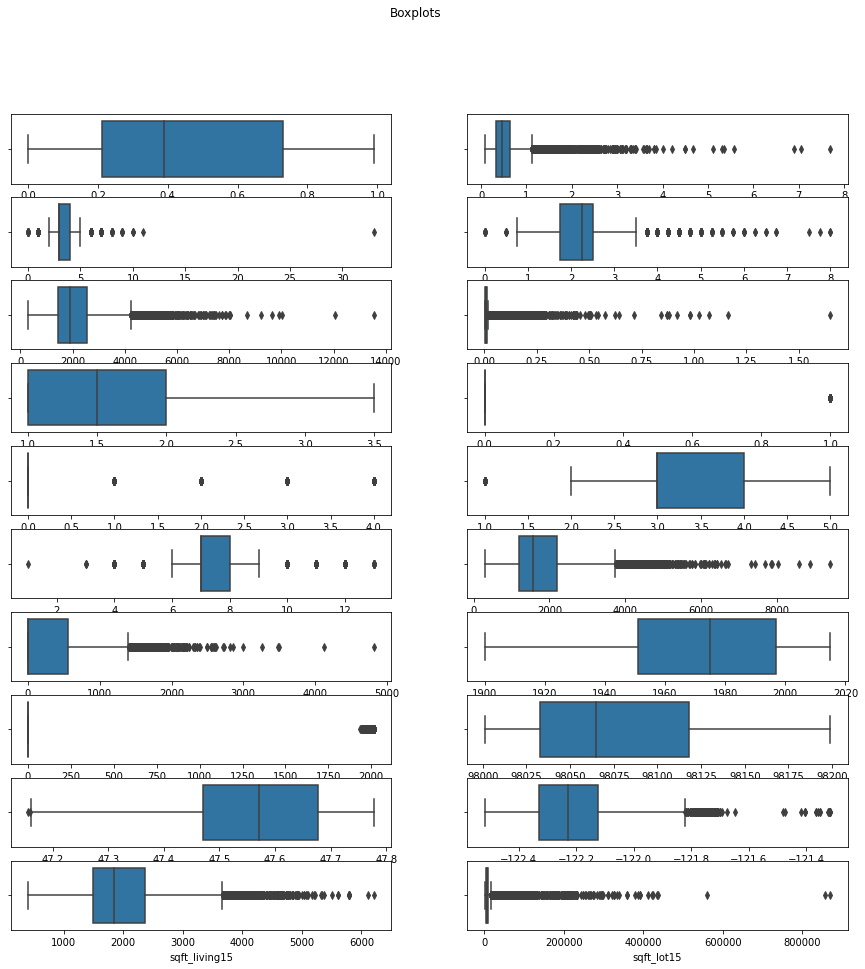

In [12]:
# Checking for Outliers
#
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20)) = plt.subplots(10,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(df['id'], ax=ax1)
sns.boxplot(df['price'], ax=ax2)
sns.boxplot(df['bedrooms'], ax=ax3)
sns.boxplot(df['bathrooms'], ax=ax4)
sns.boxplot(df['sqft_living'], ax=ax5)
sns.boxplot(df['sqft_lot'], ax=ax6)
sns.boxplot(df['floors'], ax=ax7)
sns.boxplot(df['waterfront'], ax=ax8)
sns.boxplot(df['view'], ax=ax9)
sns.boxplot(df['condition'], ax=ax10)
sns.boxplot(df['grade'], ax=ax11)
sns.boxplot(df['sqft_above'], ax=ax12)
sns.boxplot(df['sqft_basement'], ax=ax13)
sns.boxplot(df['yr_built'], ax=ax14)
sns.boxplot(df['yr_renovated'], ax=ax15)
sns.boxplot(df['zipcode'], ax=ax16)
sns.boxplot(df['lat'], ax=ax17)
sns.boxplot(df['long'], ax=ax18)
sns.boxplot(df['sqft_living15'], ax=ax19)
sns.boxplot(df['sqft_lot15'], ax=ax20)
plt.show()

In [13]:
# Checking for Anomalies
# Getting ouliers from our dataframe using a z-test
#
numeric = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
              'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
              'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
              'sqft_living15', 'sqft_lot15']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)


[[0.88614631 0.86641874 0.39873715 ... 0.30607896 0.9433552  0.26071541]
 [0.63751062 0.00594021 0.39873715 ... 0.74634143 0.43268619 0.18786773]
 [0.36544385 0.98047774 1.47395936 ... 0.13565477 1.07013975 0.17237524]
 ...
 [1.06275071 0.37588065 1.47395936 ... 0.60432128 1.41025258 0.39414129]
 [1.49104567 0.38159993 0.39873715 ... 1.02891048 0.8412214  0.42051149]
 [1.0627507  0.58576282 1.47395936 ... 0.60432128 1.41025258 0.41794772]]


In [14]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
new_df= numeric[(z < 4).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 21613
New dataframe size: 19811


In [15]:
# Identifying the Missing Data
#

new_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
# Dealing with duplicates
#

new_df.duplicated().sum()

2

In [17]:
# More data cleaning procedures
# Dropping duplicates

new_df.drop_duplicates(keep=False,inplace=True)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
# Confirming that the duplicates no longer exist

new_df.duplicated().sum()

0

In [19]:
# Dropping columns which will not affect our analysis
new_df = new_df.drop(['id','waterfront','yr_renovated'], axis = 1)
new_df.head(3)

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3        1.0  ... -122.257           1340        5650
2  180000.0         2        1.0  ... -122.233           2720        8062
3  604000.0         4        3.0  ... -122.393           1360        5000

[3 rows x 17 columns]

## 6. Exploratory Analysis

## Univariate Analysis

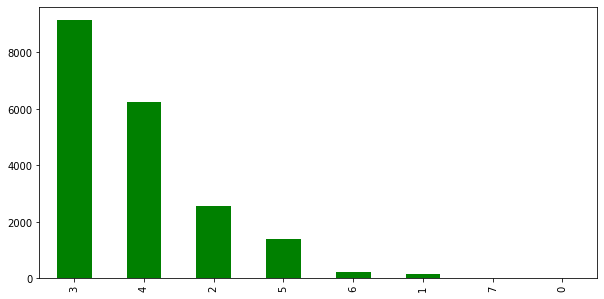

In [20]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
new_df['bedrooms'].value_counts().plot(kind = 'bar', color = 'green')

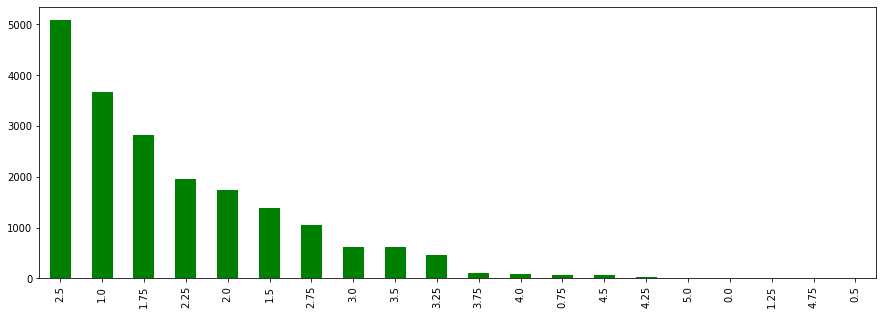

In [21]:
plt.figure(figsize = (15,5))
new_df['bathrooms'].value_counts().plot(kind = 'bar', color = 'green')

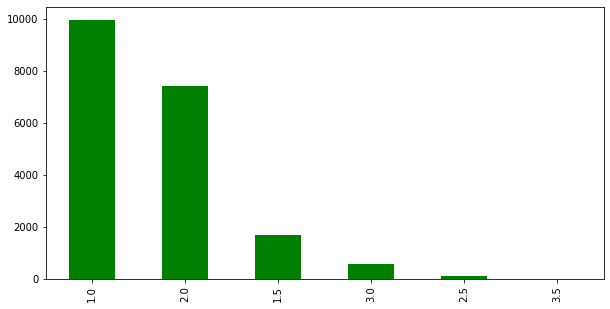

In [22]:
plt.figure(figsize = (10,5))
new_df['floors'].value_counts().plot(kind = 'bar', color = 'green')

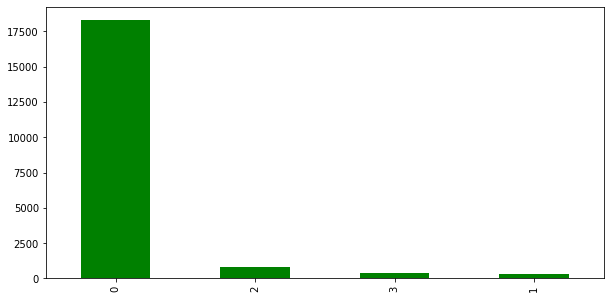

In [23]:
plt.figure(figsize = (10,5))
new_df['view'].value_counts().plot(kind = 'bar', color = 'green')

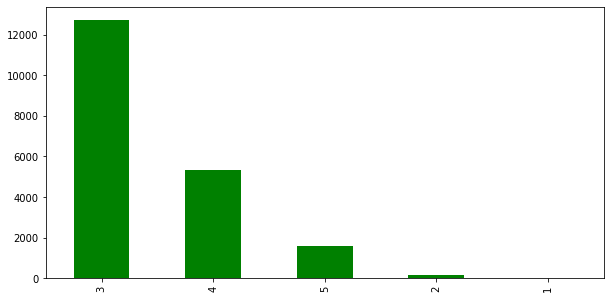

In [24]:
plt.figure(figsize = (10,5))
new_df['condition'].value_counts().plot(kind = 'bar', color = 'green')


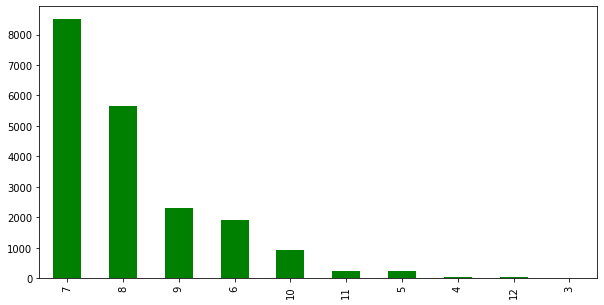

In [25]:
plt.figure(figsize = (10,5))
new_df['grade'].value_counts().plot(kind = 'bar', color = 'green')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text major ticklabel objects>)

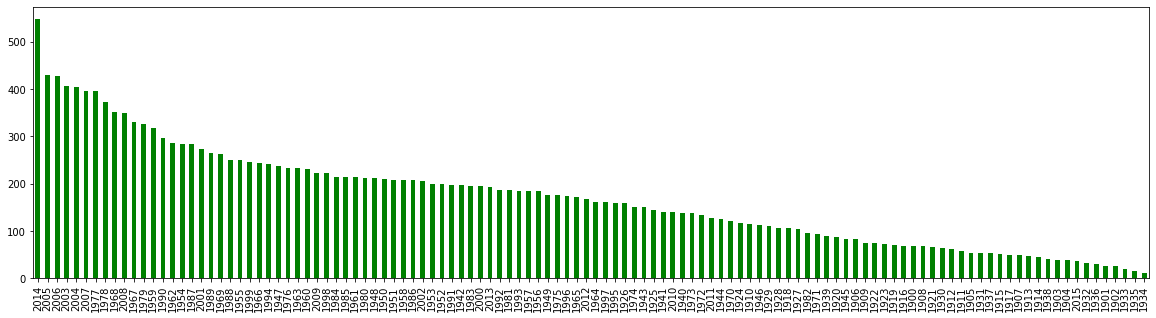

In [26]:

plt.figure(figsize = (20,5))
new_df['yr_built'].value_counts().plot(kind = 'bar', color = 'green')
plt.xticks(rotation=90)

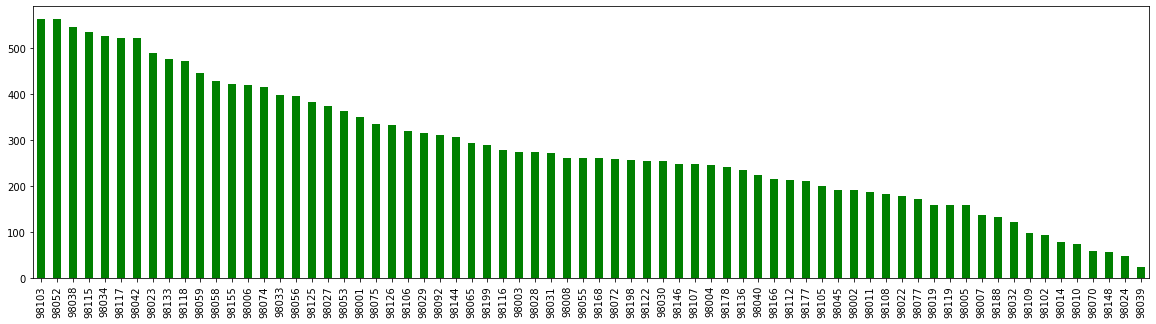

In [27]:

plt.figure(figsize = (20,5))
new_df['zipcode'].value_counts().plot(kind = 'bar', color = 'green')

## Observations
> 1. Most of the houses owned by the Hass Consultig company are three bedroomed.
> 2. Most of the houses owned by the company have 2.5 bathrooms.
> 3. Most of the houses have one floor.
> 4. Most of their houses are grade 7.
> 5. The company have most of their houses recently built, in 2014. This shows that they mostly have modern houses.
> 6. Most of the houses are located around zipcode 98103.

## Bivariate Analysis

In [28]:
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

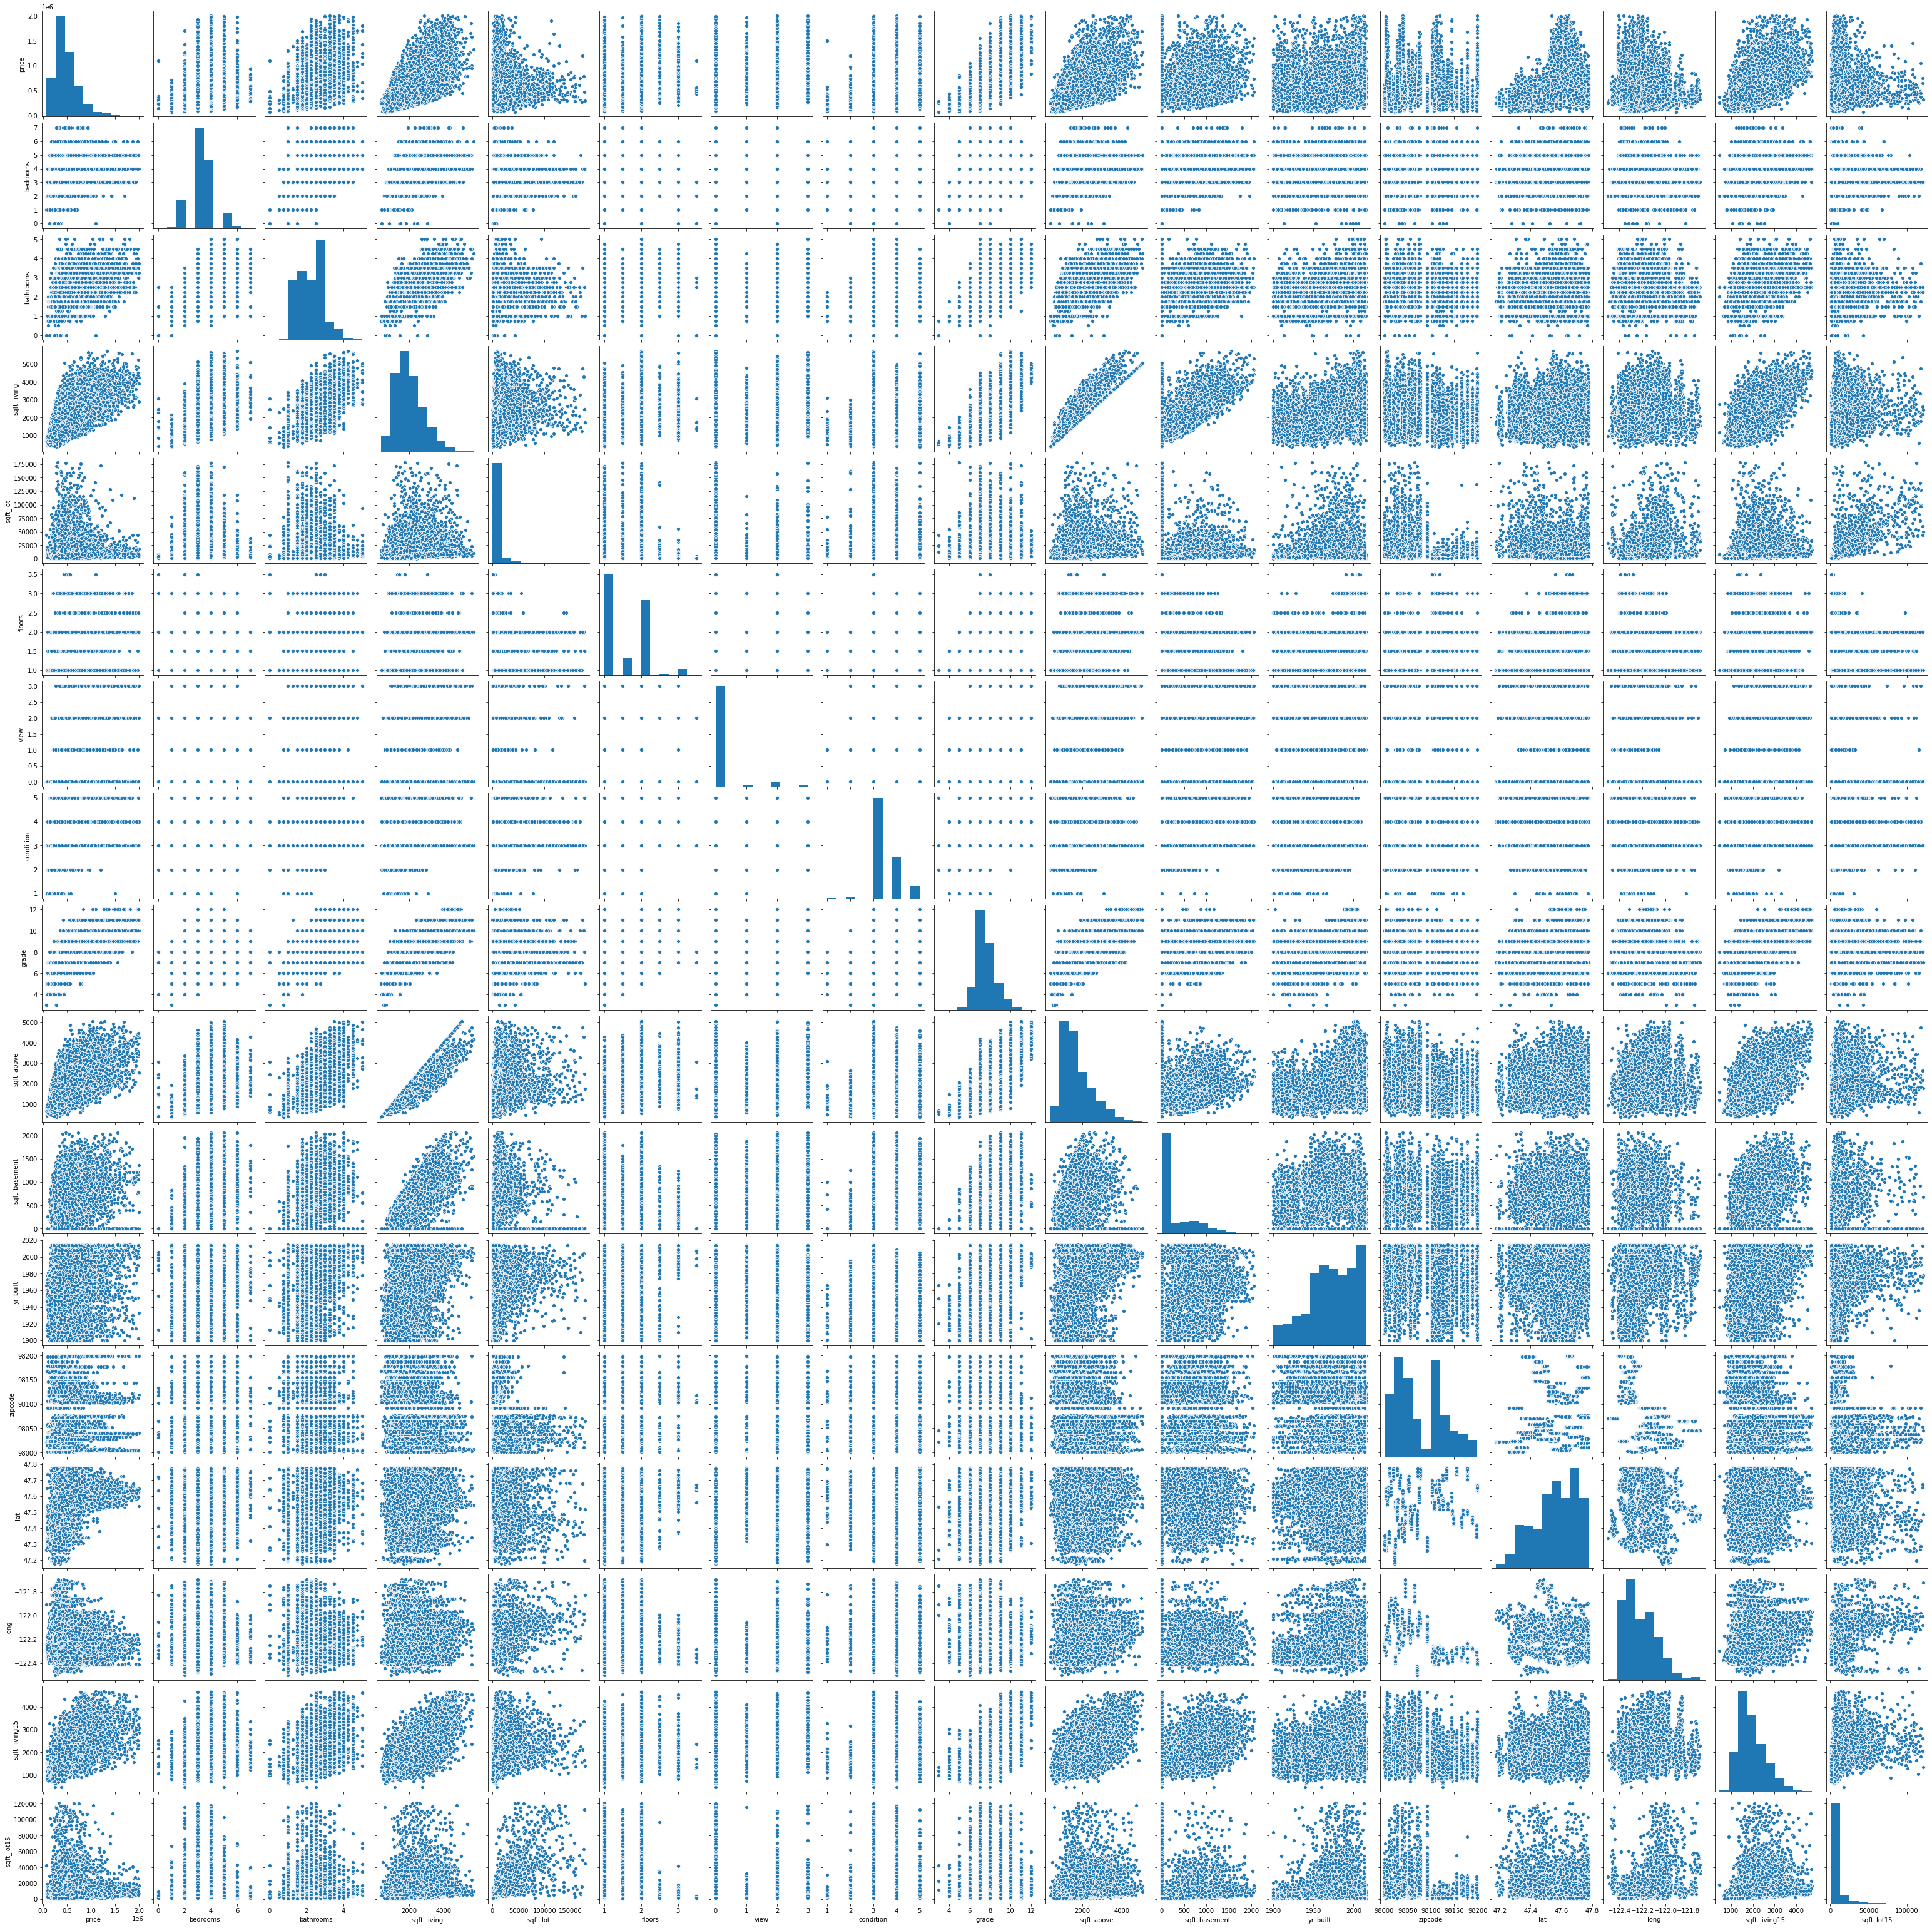

In [29]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(new_df)
plt.show()


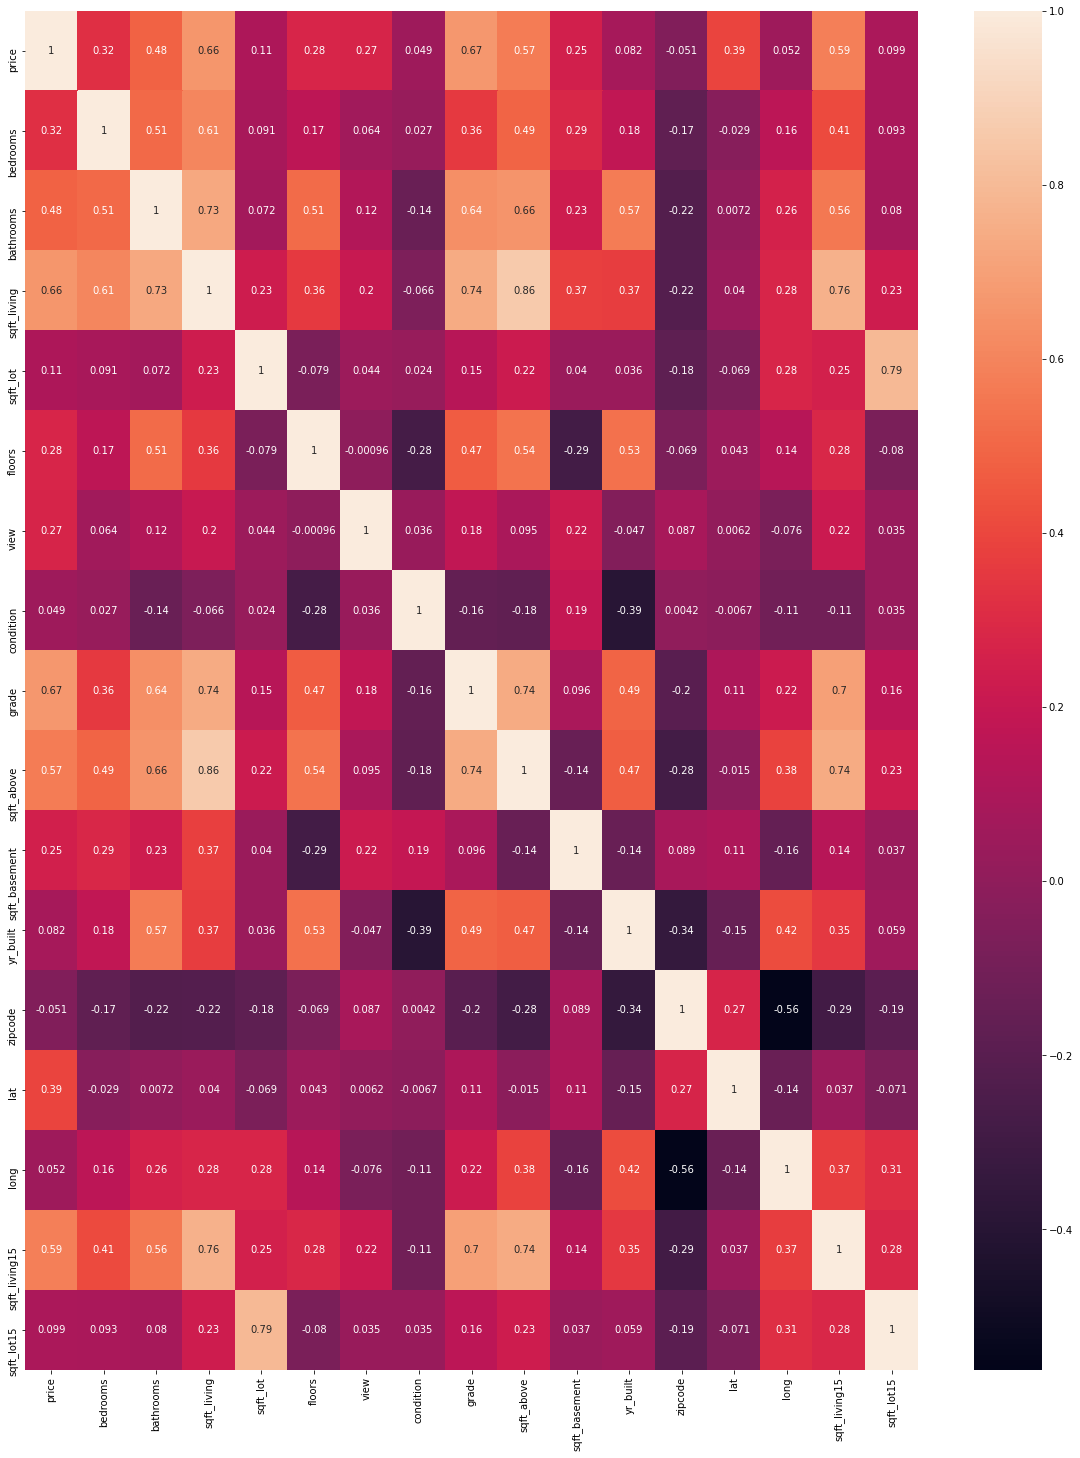

In [30]:
# Plotting a heatmap to determine the correlatuon between different variables
#

plt.figure(figsize = (20,25))
sns.heatmap(new_df.corr(), annot  = True)
plt.show()

## Observations
> 1. The grade and the size of living room in terms of square feet have a strong positive correlation to price. From this we assume that most house prices are determined based on them.
> 2. On the other hand, zipcode has a weak negative correlation. From this we assume that zipcode is not used to determine house prices.

## Multivariate Analysis

### Linear Discriminant Analysis

In [31]:
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Splitting our data into x and y variables

X =  new_df.drop(['price'], axis = 1)
y = new_df['price']

In [0]:
# Splitting our data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 30)

In [0]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and making predictions usig RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + " " + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.016153457849570924


### From our LDA our accuracy is very low and thus we conclude that it is not the best module for our analysis.

## Principal Component Analysis

In [0]:
# Splitting our data into x and y variables

X = new_df.drop('price', 1)
y = new_df['price']

In [0]:
# Splitting our data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [0]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
# Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.30563884e-01, 1.27609240e-01, 1.25163721e-01, 7.79585617e-02,
       6.06208518e-02, 5.28800013e-02, 5.01985571e-02, 3.97324912e-02,
       3.39131464e-02, 2.55601891e-02, 2.04331248e-02, 1.58161153e-02,
       1.48098180e-02, 1.25662930e-02, 1.21740051e-02, 8.65116115e-33])

In [0]:
# Using 1 Principal Component
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Training and Making Predictions using random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=30)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [99]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.007875605815831988


### From the PCA our accuracy is equally very minimal.

# Regression Analysis

## Detecting Multicollinearity

In [46]:
# Checking for multicollinearity on the independent variables only

independent = new_df.drop('price', 1)
correlations = independent.corr()
correlations

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.510801  ...       0.411472    0.093196
bathrooms      0.510801   1.000000  ...       0.556323    0.079863
sqft_living    0.608311   0.730199  ...       0.763872    0.230199
sqft_lot       0.090813   0.072394  ...       0.251166    0.792667
floors         0.167394   0.512251  ...       0.283195   -0.079684
view           0.064302   0.122507  ...       0.216374    0.034740
condition      0.027399  -0.135037  ...      -0.109378    0.034963
grade          0.355565   0.639718  ...       0.698932    0.159299
sqft_above     0.493259   0.656131  ...       0.738056    0.225550
sqft_basement  0.286249   0.225954  ...       0.141448    0.036874
yr_built       0.180372   0.572653  ...       0.348861    0.058616
zipcode       -0.172427  -0.224332  ...      -0.292060   -0.191625
lat           -0.028598   0.007222  ...       0.037183   -0.071067
long           0.161887   0.260394  ...       0.370148    0.312548
sqft_living15  0.411472   0.556323  ...       1.000000    0.280884
sqft_lot15     0.093196   0.079863  ...       0.280884    1.000000

[16 rows x 16 columns]

## Computing the Variance Inflation Factor(VIF)
> We create a new dataframe with the INVERSE of the correlations above.

In [47]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.734728  -0.430747  ...       0.077860    0.036214
bathrooms     -0.430747   3.216221  ...       0.017504    0.077764
sqft_living   -0.890302  -2.764131  ...      -0.606237    0.126164
sqft_lot       0.055037   0.048889  ...       0.077134   -2.089996
floors         0.098481  -0.684616  ...       0.282871    0.144966
view           0.099502  -0.038984  ...      -0.269442    0.034476
condition     -0.045553  -0.163205  ...       0.112531   -0.075797
grade          0.308522  -0.221630  ...      -0.844997   -0.042706
sqft_above    -0.247104   1.482955  ...      -1.157439   -0.160464
sqft_basement -0.121835   0.363176  ...      -0.239263   -0.076895
yr_built       0.144487  -0.992491  ...       0.138286   -0.034623
zipcode        0.091215   0.045128  ...       0.203679   -0.054344
lat            0.061421  -0.042120  ...      -0.091419    0.037999
long           0.020498   0.006158  ...      -0.343309   -0.249429
sqft_living15  0.077860   0.017504  ...       3.077597   -0.230503
sqft_lot15     0.036214   0.077764  ...      -0.230503    2.813896

[16 rows x 16 columns]

> Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. 

> From this we observe that no of the variables have a VIF nearing 5 or above 5 hence we won't drop any features.



## Residual Plots and Heteroscedasticity Test

In [0]:
# Splitting our data into training and test sets

X = independent.values
y = new_df['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# This is our prediction for price based on our model
price_predict = regressor.predict(X_test)

In [52]:
# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
x = pd.DataFrame(residuals).describe()
x

0
count    3962.000000
mean     1606.597476
std    140519.008632
min   -967407.835034
25%    -60491.032254
50%     11711.751468
75%     82139.737762
max    450422.741801

In [53]:
# Getting the mean for the residuals
residuals.mean()


1606.5974764296354

## The residual plot

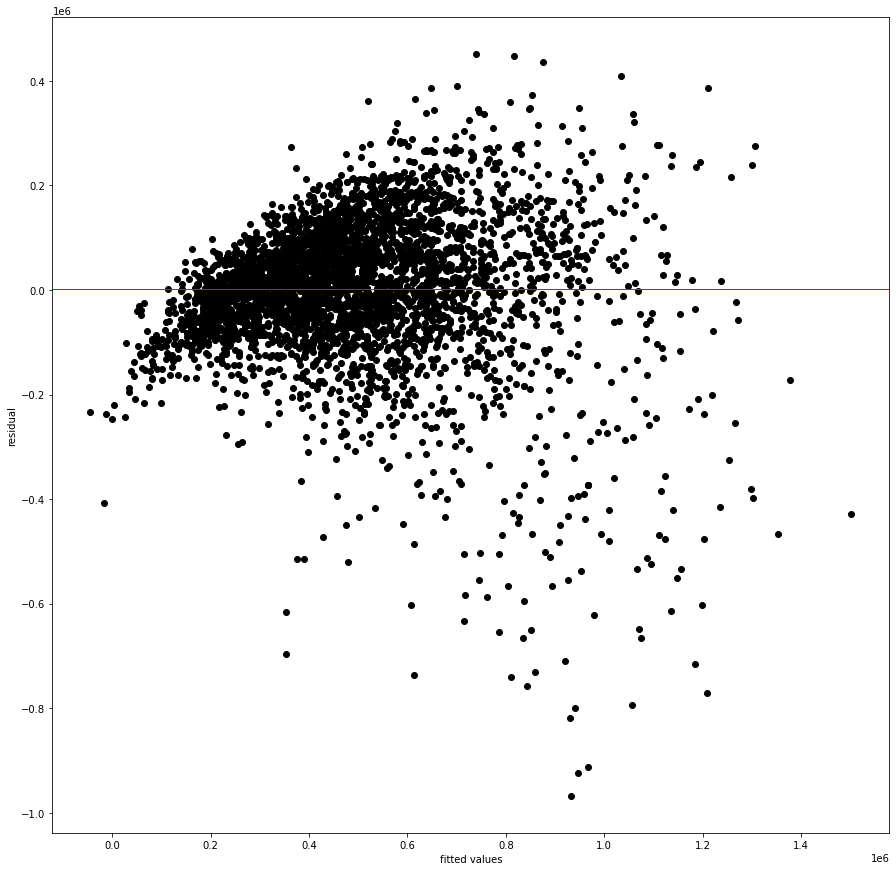

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Barlett's Test of Heteroscedasticity

In [55]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

inf
The variances are homogeneous.


# Multiple Linear Regression

In [0]:
# We define our predictor and target variables as follows

X = new_df.drop('price', 1)
y = new_df['price']

In [0]:
# We split our training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
# We fit our training data into our model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# We get the coefficients of our regression model 
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# From the output, this means that for a unit increase in number of bedrooms, 
# there is a decrease of -20012.021945 in house price.
# Similarly, a unit increase in sqft_living results in an increase of 71.403377 increase in house price. 
# We also observe that all the features affect the price of the houses in one way or another.

Coefficient
bedrooms       -20012.021945
bathrooms       33402.617645
sqft_living        71.403377
sqft_lot            0.238996
floors          25565.692632
view            42867.097054
condition       27928.539323
grade           88241.621730
sqft_above         45.001671
sqft_basement      26.401706
yr_built        -2304.568547
zipcode          -377.204965
lat            578806.129130
long          -119607.538145
sqft_living15      39.349004
sqft_lot15         -0.874099

In [60]:
# We create a vector of the predictions

y_pred = regressor.predict(X_test)
print(y_pred)

[ 76407.92387763 246502.60112199 931137.54060491 ... 336384.16630321
 468670.84154634 614548.3417933 ]


In [61]:
# To compare the actual output values for y_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
7869    231200.0   76407.923878
16955   218000.0  246502.601122
21473  1750000.0  931137.540605
14468   307000.0  308654.618596
7657    190000.0   73350.294018
...          ...            ...
161     438000.0  490792.202251
13430   450000.0  432023.717742
6299    319950.0  336384.166303
1779    355000.0  468670.841546
6223    672000.0  614548.341793

[3962 rows x 2 columns]

In [125]:
new_df['price'].mean()

499638.7050537689

In [62]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We get the value of root mean squared error as 140510.45939266807, 
# which is  greater than 10% of the mean value of the price of all houses. 
# This means that our algorithm was not very accurate and cannot make good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 2. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 98601.03632981208
Mean Squared Error: 19743189198.738625
Root Mean Squared Error: 140510.45939266807


# Quantile Regression

In [0]:
# Quantile regression features

bedrooms	= new_df['bedrooms'].values
bathrooms	= new_df['bathrooms'].values
sqft_living	= new_df['sqft_living'].values
sqft_lot	= new_df['sqft_lot'].values
floors	= new_df['floors'].values
view	= new_df['view'].values
condition	= new_df['condition'].values
grade	= new_df['grade'].values
sqft_above	= new_df['sqft_above'].values
sqft_basement	= new_df['sqft_basement'].values
yr_built	= new_df['yr_built'].values
zipcode	= new_df['zipcode'].values
lat	= new_df['lat'].values
long_	= new_df['long'].values
sqft_living15	= new_df['sqft_living15'].values
sqft_lot15	= new_df['sqft_lot15'].values

# Defining x and y
x = new_df.drop('price', 1).values
y = new_df['price'].values

In [121]:
# Fitting our  quantile model using the bedroom feature
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ bedrooms', new_df)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04516
Model:                       QuantReg   Bandwidth:                   3.814e+04
Method:                 Least Squares   Sparsity:                    5.275e+05
Date:                Sun, 07 Jun 2020   No. Observations:                19807
Time:                        11:13:00   Df Residuals:                    19805
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.94e+05   7418.567     26.151      0.000    1.79e+05    2.09e+05
bedrooms     7.65e+04   2145.178     35.661      0.000    7.23e+04    8.07e+04
*****************************************************************
Intercept    193999.999996
bedrooms      76500.000002
dtype: floa

In [122]:
# Fitting the quantiles

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['bedrooms']] + res1.conf_int().loc['bedrooms'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'bedrooms_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

quantile      intercept  bedrooms_coef  cf_lower_bound  cf_upper_bound
0      0.25  145633.333329   52183.333335    48991.606163    55375.060507
1      0.50  193999.999996   76500.000002    72295.271569    80704.728435
2      0.75  215000.000002  119999.999999   114392.900103   125607.099895

In [123]:
# We do a Linear regression using OLS

ols = smf.ols('y ~ bedrooms', new_df).fit()
print(ols.summary())

param1 = ols.conf_int().loc['bedrooms'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           bedrooms_coef = ols.params['bedrooms'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2279.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:17:35   Log-Likelihood:            -2.7424e+05
No. Observations:               19807   AIC:                         5.485e+05
Df Residuals:                   19805   BIC:                         5.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.756e+05   7015.420     25.025      0.0

Text(0, 0.5, 'y')

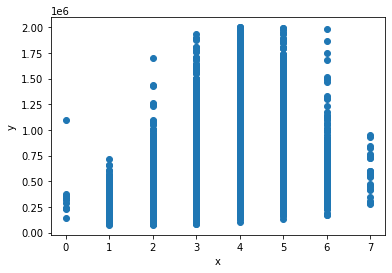

In [155]:
x_ = bedrooms
y_ = new_df['price'].values

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")

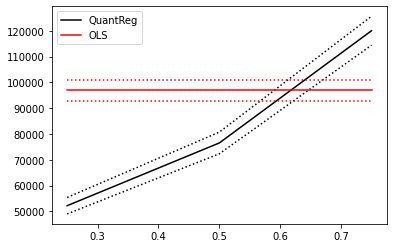

In [136]:

n = param.shape[0]
p1 = plt.plot(param['quantile'], param['bedrooms_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['bedrooms_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

In [140]:
# Fitting our  quantile model using the bathrooms feature
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ bathrooms', new_df)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1093
Model:                       QuantReg   Bandwidth:                   3.565e+04
Method:                 Least Squares   Sparsity:                    4.953e+05
Date:                Sun, 07 Jun 2020   No. Observations:                19807
Time:                        12:36:17   Df Residuals:                    19805
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.519e+05   5353.370     28.377      0.000    1.41e+05    1.62e+05
bathrooms    1.48e+05   2441.528     60.634      0.000    1.43e+05    1.53e+05
*****************************************************************
Intercept    151910.0
bathrooms    148040.0
dtype: float64


In [141]:
# Fitting the quantiles

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['bathrooms']] + res1.conf_int().loc['bathrooms'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'bathrooms_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

quantile      intercept  bathrooms_coef  cf_lower_bound  cf_upper_bound
0      0.25  116000.000000   104000.000000   100587.741092   107412.258908
1      0.50  151910.000000   148040.000000   143254.400749   152825.599252
2      0.75  200666.666666   199333.333334   192612.876792   206053.789877

In [142]:
# We do a Linear regression using OLS

ols = smf.ols('y ~ bathrooms', new_df).fit()
print(ols.summary())

param1 = ols.conf_int().loc['bathrooms'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           bathrooms_coef = ols.params['bathrooms'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5982.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:38:39   Log-Likelihood:            -2.7271e+05
No. Observations:               19807   AIC:                         5.454e+05
Df Residuals:                   19805   BIC:                         5.454e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.352e+05   4989.225     27.097      0.0

Text(0, 0.5, 'y')

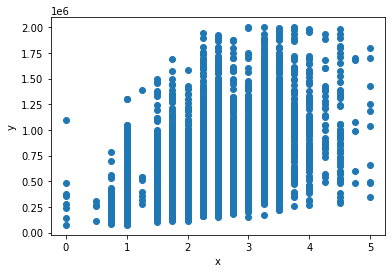

In [156]:
x_ = bathrooms
y_ = new_df['price'].values

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")

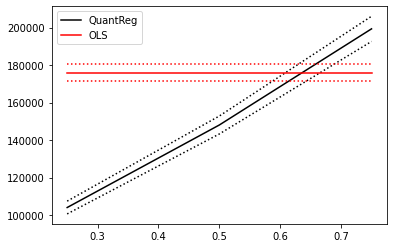

In [143]:
n = param.shape[0]
p1 = plt.plot(param['quantile'], param['bathrooms_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['bathrooms_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

In [146]:
# Fitting our  quantile model using the grade feature
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ grade', new_df)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2461
Model:                       QuantReg   Bandwidth:                   2.973e+04
Method:                 Least Squares   Sparsity:                    4.153e+05
Date:                Sun, 07 Jun 2020   No. Observations:                19807
Time:                        12:47:09   Df Residuals:                    19805
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.22e+05   1.03e+04    -60.301      0.000   -6.42e+05   -6.02e+05
grade        1.44e+05   1344.920    107.070      0.000    1.41e+05    1.47e+05
*****************************************************************
Intercept   -622000.000001
grade        144000.000000
dtype: floa

In [147]:
# Fitting the quantiles

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['grade']] + res1.conf_int().loc['grade'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'grade_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

quantile      intercept     grade_coef  cf_lower_bound  cf_upper_bound
0      0.25 -540695.000006  119282.500001   117307.647005   121257.352997
1      0.50 -622000.000001  144000.000000   141363.843299   146636.156701
2      0.75 -638499.999909  162249.999985   158221.361569   166278.638400

In [152]:
# We do a Linear regression using OLS

ols = smf.ols('y ~ grade', new_df).fit()
print(ols.summary())

param1 = ols.conf_int().loc['grade'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           grade_coef = ols.params['grade'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.595e+04
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:51:56   Log-Likelihood:            -2.6947e+05
No. Observations:               19807   AIC:                         5.389e+05
Df Residuals:                   19805   BIC:                         5.390e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.175e+05   9736.715    -73.689      0.0

Text(0, 0.5, 'y')

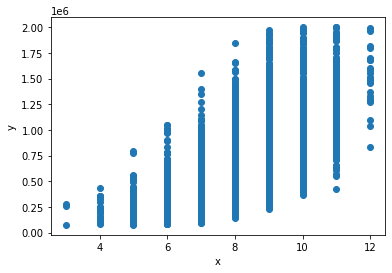

In [157]:
x_ = grade
y_ = new_df['price'].values

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")

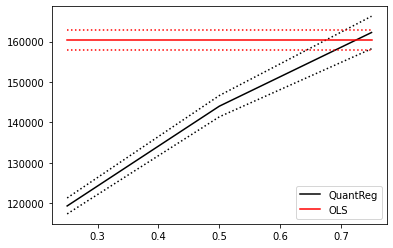

In [153]:
n = param.shape[0]
p1 = plt.plot(param['quantile'], param['grade_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['grade_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

# Rigde Regression

In [0]:
# Defining our x and y

X = new_df.drop(['price'], 1)
y = new_df['price']

In [106]:
# Creating our baseline regression model with no regularization 
# 
regression = LinearRegression()
regression.fit(X,y)
model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model)

# The output  value of 21297701886.072662 will be our indicator to determine if the regularized ridge regression model is superior or not.

21297701886.072662


In [0]:
# We first determine the most appropriate value for the l2 regularization using GridSearchCV 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-1,5,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [108]:
# We use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 
 

21791732434.503563

In [110]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

21301560652.62635


In [68]:
# The 21301560652.62635 is lower than the 21791732434.503563 This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,new_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are different. This means that the penalization made a huge difference with this dataset.

{'bathrooms': 70.26938330022858,
 'bedrooms': 31685.747062242146,
 'condition': 90404.03398683596,
 'floors': 44527.2784285135,
 'grade': 43.297051268640644,
 'lat': -114792.05727706506,
 'long': 38.801017634687014,
 'price': -19095.10640536882,
 'sqft_above': 26.972331854973163,
 'sqft_basement': -2327.1287927686926,
 'sqft_living': 0.18414190220937598,
 'sqft_living15': -0.8783497896620247,
 'sqft_lot': 26989.590597755057,
 'view': 28395.51510523173,
 'yr_built': -380.9104575526265,
 'zipcode': 576469.1963373029}

# Lasso Regression

In [0]:
# Defining our x and y

X = new_df.drop('price', 1)
y = new_df['price']


In [0]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [71]:
# We will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# The alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.692943970162853
lasso MSE: 21297701926.12784
lasso coef: [-16680.64193425  22831.38328472 163663.85772355   2563.72032675
  14616.36855739  25468.78508333  18528.63228623  99181.43839296
 -67785.76565388 -43591.48394343 -67304.89429804 -20320.39969641
  80167.43509958 -15649.85626603  24919.93415506  -9606.79772871]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10599302668770.5, tolerance: 137383259424.85051
  positive)


In [72]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# To do that we define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# We made necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,5,0.1), np.arange(2, 10, 0.5), np.arange(5, 30, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.30000000000000004}
lasso score: 0.7068571134670205
linear score: 0.7068570606949509
lasso MSE: 21258498855.991505
linear MSE: 21258502682.981808
lasso best estimator coef: [-17633.9621794   23176.42294615 163861.66960988   3717.34052226
  13857.76859074  23712.07082038  17663.31081032  98220.3148321
 -67057.99666812 -44123.97313792 -67617.58335589 -20417.62506874
  79760.52774956 -16023.80744278  25958.0868343   -9691.88725424]
linear coef: [-17634.2703379   23178.29515822  47326.95643214   3718.49356283
  13857.85963661  23712.21173514  17663.59912672  98219.64260476
  42158.06982691  15321.47985277 -67618.26157985 -20418.37488911
  79760.92063321 -16024.54245495  25959.82764014  -9692.97489189]


# Elastic Regression

In [75]:
new_df.head()

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
2  180000.0         2       1.00  ... -122.233           2720        8062
3  604000.0         4       3.00  ... -122.393           1360        5000
4  510000.0         3       2.00  ... -122.045           1800        7503
6  257500.0         3       2.25  ... -122.327           2238        6819

[5 rows x 17 columns]

In [0]:
# Defining our X and y variables

X = new_df.drop('price', 1)
y = new_df['price']

In [87]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model) 

# This mean standard error score of 21297701886.072662 is our benchmark for determining 
# if the elastic net model will be better or worst. 

21297701886.072662


In [88]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 31685.747062242146,
 'bedrooms': -19095.10640536882,
 'condition': 28395.51510523173,
 'floors': 26989.590597755057,
 'grade': 90404.03398683596,
 'lat': 576469.1963373029,
 'long': -114792.05727706506,
 'sqft_above': 43.297051268640644,
 'sqft_basement': 26.972331854973163,
 'sqft_living': 70.26938330022858,
 'sqft_living15': 38.801017634687014,
 'sqft_lot': 0.18414190220937598,
 'sqft_lot15': -0.8783497896620247,
 'view': 44527.2784285135,
 'yr_built': -2327.1287927686926,
 'zipcode': -380.9104575526265}

In [0]:
# Elastic Net Model
# We normalize data then create a grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-2,5,4),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [92]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

61952473105.13869

In [161]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.85. 
# With these settings we got an MSE of 21376269840.49457. This is above our baseline model of MSE 21297701886.072662  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.75)
elastic.fit(X,y)
model_2=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(model_2)

21376269840.49457


In [95]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are different.  
# This means that this values was  good to the algorithm. Traditional regression can do this.

{'bathrooms': 16835.949660085174,
 'bedrooms': 8029.945434238794,
 'condition': 5768.826812733233,
 'floors': 12772.526221226815,
 'grade': 18784.51708312684,
 'lat': 119107.61041694015,
 'long': -10879.212864254905,
 'sqft_above': 20.87944864201246,
 'sqft_basement': 19.452766189834072,
 'sqft_living': 23.401975807463884,
 'sqft_living15': 25.994637898315027,
 'sqft_lot': 0.14084151981269416,
 'sqft_lot15': 0.132064081932044,
 'view': 15874.398162963591,
 'yr_built': -83.88526397418626,
 'zipcode': 4.182344643394695}

### From the above regression analyses, Elastic net model tends to give better results as the value of alpha decreases. Since it is a combination of both rigde and elastic regressions, it yields better results.